# Assignment A1: Predicting Car Price 
## Nutdanai Sritunya MMI st123055

In [172]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
import matplotlib

# 1. Load and preparing datasets

In [173]:
df = pd.read_csv('./Cars.csv')

In [174]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [175]:
# That mean you data have 12 feature and 1 label 
df.shape

(8128, 13)

In [176]:
# Check Dtypes of your input data
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


you will see that are so many object type so we need to do something with this first. Follow the instruction of Chaky, First we need to
- map First owner to 1, ..., Test Drive Car to 5

In [177]:
le = LabelEncoder()
print(set(df["owner"]))
df["owner"] = le.fit_transform(df["owner"])+1

{'First Owner', 'Third Owner', 'Fourth & Above Owner', 'Second Owner', 'Test Drive Car'}


In [178]:
df["owner"]

0       1
1       3
2       5
3       1
4       1
       ..
8123    1
8124    2
8125    1
8126    1
8127    1
Name: owner, Length: 8128, dtype: int32

In [179]:
le.transform(['First Owner'])

array([0])

In [180]:
set(df["owner"]) #Now the owner feature is already map to number

{1, 2, 3, 4, 5}

• For the feature fuel, remove all rows with CNG and LPG because CNG and LPG use a different
mileage system i.e., km/kg which is different from kmfeaturepl for Diesel and Petrol

In [181]:
df['fuel'].value_counts() #Before

Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: fuel, dtype: int64

In [182]:
df_filtered = df.loc[~df['fuel'].isin(['CNG', 'LPG'])]
df_filtered['fuel'].value_counts() #After

Diesel    4402
Petrol    3631
Name: fuel, dtype: int64

- For the feature mileage, remove “kmpl” and convert the column to numerical type (e.g., float).
Hint: use df.mileage.str.split

In [183]:
df_filtered['mileage'][0]

'23.4 kmpl'

In [184]:
# Remove the "kmpl" by split and select the first object ['23.4', 'kmpl'] and convert to float
df_filtered['mileage'] = df_filtered['mileage'].str.split(' ').str[0].astype(float)

C:\Users\earth\AppData\Local\Temp/ipykernel_26596/3418012339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['mileage'] = df_filtered['mileage'].str.split(' ').str[0].astype(float)


- For the feature engine, remove “CC” and convert the column to numerical type (e.g., float)

In [185]:
df_filtered['engine'] = df_filtered['engine'].str.split(' ').str[0].astype(float)

C:\Users\earth\AppData\Local\Temp/ipykernel_26596/3239265068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['engine'] = df_filtered['engine'].str.split(' ').str[0].astype(float)


- Do the same for max power

In [186]:
df_filtered['max_power'] = df_filtered['max_power'].str.split(' ').str[0].astype(float)

C:\Users\earth\AppData\Local\Temp/ipykernel_26596/1974573241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['max_power'] = df_filtered['max_power'].str.split(' ').str[0].astype(float)


 For the feature brand, take only the first word and remove the rest

In [187]:
df_filtered['name'] = df_filtered['name'].str.split(' ').str[0]

C:\Users\earth\AppData\Local\Temp/ipykernel_26596/81196181.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['name'] = df_filtered['name'].str.split(' ').str[0]


Drop the feature torque, simply because Chaky’s company does not understand well about it

In [188]:
df_filtered = df_filtered.drop('torque', axis=1)

- You will found out that Test Drive Cars are ridiculously expensive. Since we do not want to
involve this, we will simply delete all samples related to it

In [189]:
le.transform(["Test Drive Car"])

array([3])

In [190]:
print(df_filtered['owner'].unique(), df_filtered['owner'].count()) #the owner feature before we delete Test drive car
df_filteredd = df_filtered[df_filtered['owner'] != 3] #we know Test drive car is map to 3
print(df_filteredd['owner'].unique(), df_filteredd['owner'].count()) #the owner after deleted

[1 3 5 2 4] 8033
[1 5 2 4] 5960


- Since selling price is a big number, it can cause your prediction to be very unstable. One trick
is to first transform the label using log transform, i.e.,

In [191]:
df_filteredd['selling_price'] = np.log(df_filteredd['selling_price'])

C:\Users\earth\AppData\Local\Temp/ipykernel_26596/2761593400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filteredd['selling_price'] = np.log(df_filteredd['selling_price'])


Finally this is a clean data after do following step.

In [192]:
df_filteredd.head() 

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,13.017003,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
2,Honda,2006,11.970350,140000,Petrol,Individual,Manual,5,17.70,1497.0,78.00,5.0
3,Hyundai,2010,12.323856,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,11.775290,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0
5,Hyundai,2017,12.994530,45000,Petrol,Individual,Manual,1,20.14,1197.0,81.86,5.0


In [193]:
df_filteredd.describe()

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats
count,5960.000000,5960.000000,5.960000e+03,5960.000000,5831.000000,5831.000000,5837.000000,5831.000000
mean,2014.561074,13.105088,6.268093e+04,1.398154,19.637210,1456.294461,93.591889,5.401475
std,3.835775,0.836889,4.965373e+04,1.160271,3.998052,496.104314,37.144458,0.944711
min,1983.000000,10.308919,1.000000e+03,1.000000,0.000000,624.000000,0.000000,2.000000
25%,2012.000000,12.611538,2.809500e+04,1.000000,16.950000,1197.000000,70.000000,5.000000
50%,2016.000000,13.122363,5.458500e+04,1.000000,19.610000,1248.000000,83.140000,5.000000
75%,2017.000000,13.507626,9.000000e+04,1.000000,22.540000,1582.000000,103.500000,5.000000
max,2020.000000,16.118096,1.500000e+06,5.000000,42.000000,3604.000000,400.000000,14.000000


In [194]:
df_filteredd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5960 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           5960 non-null   object 
 1   year           5960 non-null   int64  
 2   selling_price  5960 non-null   float64
 3   km_driven      5960 non-null   int64  
 4   fuel           5960 non-null   object 
 5   seller_type    5960 non-null   object 
 6   transmission   5960 non-null   object 
 7   owner          5960 non-null   int32  
 8   mileage        5831 non-null   float64
 9   engine         5831 non-null   float64
 10  max_power      5837 non-null   float64
 11  seats          5831 non-null   float64
dtypes: float64(5), int32(1), int64(2), object(4)
memory usage: 582.0+ KB


## 2. Exploratory Data Analysis

EDA is an essential step to inspect the data, so to better understand nature of the given data.

### Boxplot

<AxesSubplot:xlabel='seats', ylabel='count'>

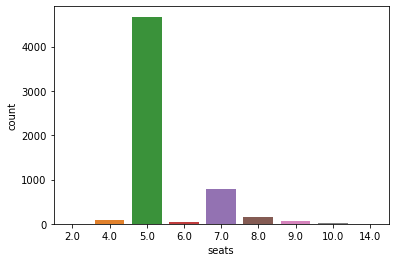

In [195]:
# most of data in this datasets is 5 seats car.
sns.countplot(data = df_filteredd, x = 'seats')

<AxesSubplot:xlabel='transmission', ylabel='count'>

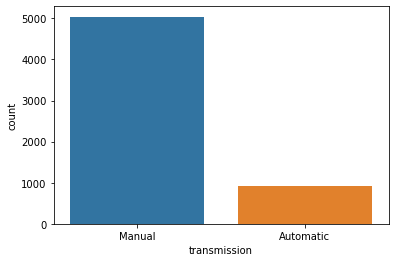

In [200]:
sns.countplot(data = df_filteredd, x = 'transmission')

<AxesSubplot:xlabel='seller_type', ylabel='count'>

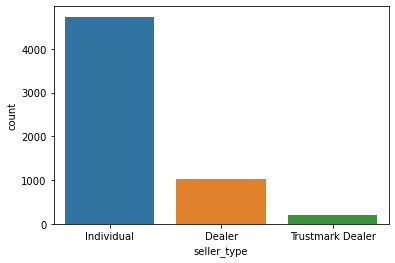

In [201]:
sns.countplot(data = df_filteredd, x = 'seller_type')

#### Correlation Matrix

Let's use correlation matrix to find strong factors predicting the life expectancy.  It's also for checking whether certain features are too correlated.

<AxesSubplot:>

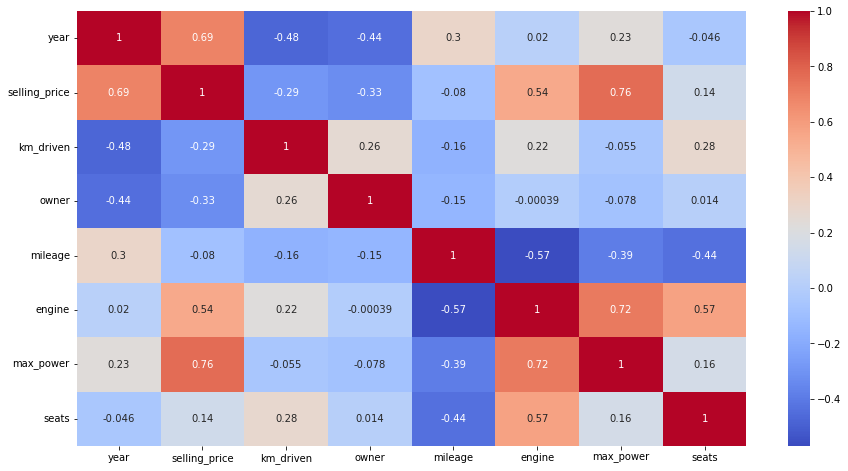

In [203]:
filtered_corr = df_filteredd.corr()
plt.figure(figsize = (15,8))
sns.heatmap(filtered_corr,  annot=True, cmap="coolwarm")

<AxesSubplot:xlabel='x', ylabel='y'>

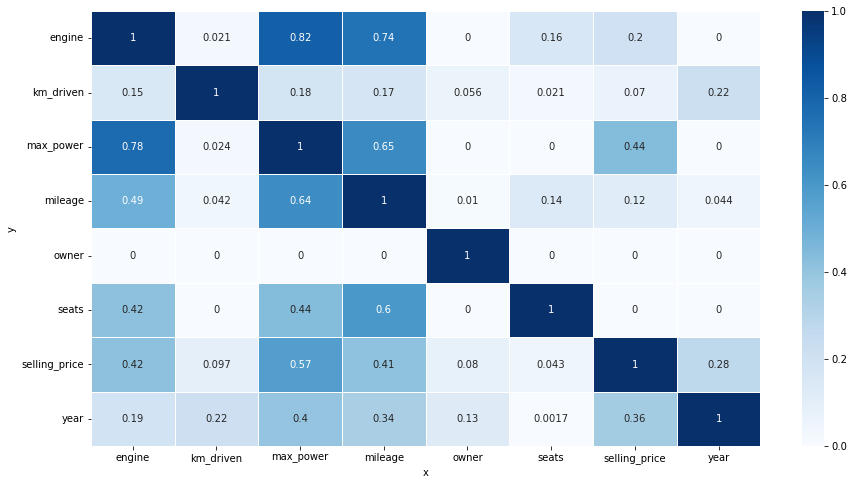

In [205]:
import ppscore as pps

# before using pps, let's drop country and year
dfcopy = df_filteredd.copy()
dfcopy.drop([ 'transmission', 'name', 'seller_type', 'fuel'], axis='columns', inplace=True)

#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

## 3. Feature selection

In [206]:
X = dfcopy[['engine', 'max_power', 'year']]
y = dfcopy["selling_price"]

In [207]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 99)

In [208]:
X_train[['engine', 'max_power', 'year']].isna().sum()

engine       98
max_power    95
year          0
dtype: int64

In [209]:
X_test[['engine', 'max_power', 'year']].isna().sum()

engine       31
max_power    28
year          0
dtype: int64

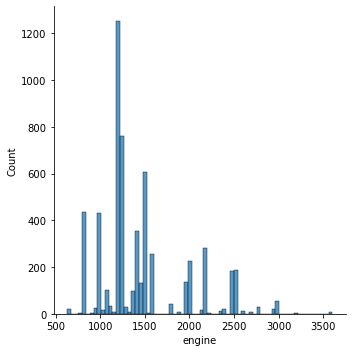

In [210]:
sns.displot(data=dfcopy, x='engine')

In [211]:
mode_value = dfcopy['engine'].mode()[0]
print("Mode (value with highest count):", mode_value)

Mode (value with highest count): 1248.0


In [212]:
dfcopy['engine'].median()

1248.0

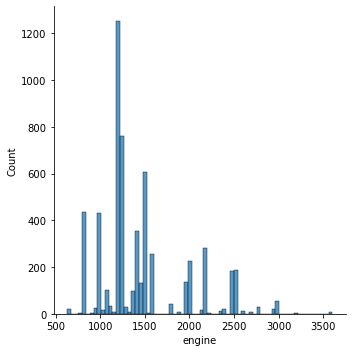

In [ ]:
sns.displot(data=dfcopy, x='engine')

In [ ]:
mode_value = dfcopy['engine'].mode()[0]
print("Mode (value with highest count):", mode_value)

Mode (value with highest count): 1248.0


In [ ]:
dfcopy['engine'].median()

1248.0

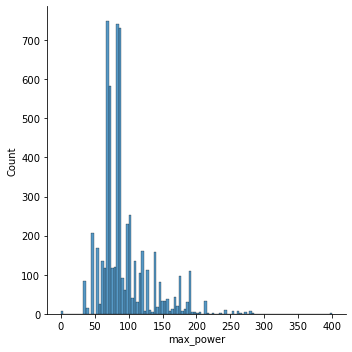

In [213]:
sns.displot(data=dfcopy, x='max_power')

In [214]:
mode_value = dfcopy['max_power'].mode()[0]
print("Mode (value with highest count):", mode_value)

Mode (value with highest count): 74.0


In [215]:
dfcopy['max_power'].median()

83.14

In [216]:
dfcopy['max_power'].mean()

93.59188881274514

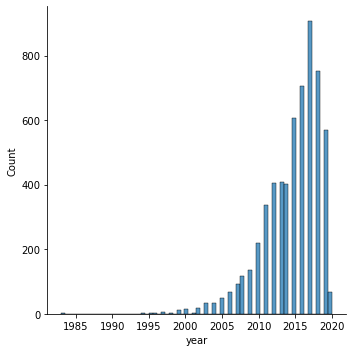

In [217]:
sns.displot(data=dfcopy, x='year')

In [218]:
mode_value = dfcopy['year'].mode()[0]
print("Mode (value with highest count):", mode_value)

Mode (value with highest count): 2017


In [219]:
dfcopy['year'].median()

2016.0

In [221]:
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['year'].fillna(X_train['year'].median(), inplace=True)

c:\Users\earth\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [222]:
X_test['engine'].fillna(X_test['engine'].median(), inplace=True)
X_test['max_power'].fillna(X_test['max_power'].median(), inplace=True)
X_test['year'].fillna(X_test['year'].median(), inplace=True)

In [223]:
X_train[['engine', 'max_power', 'year']].isna().sum()

engine       0
max_power    0
year         0
dtype: int64

In [224]:
X_test[['engine', 'max_power', 'year']].isna().sum()

engine       0
max_power    0
year         0
dtype: int64

#### Check the outliner

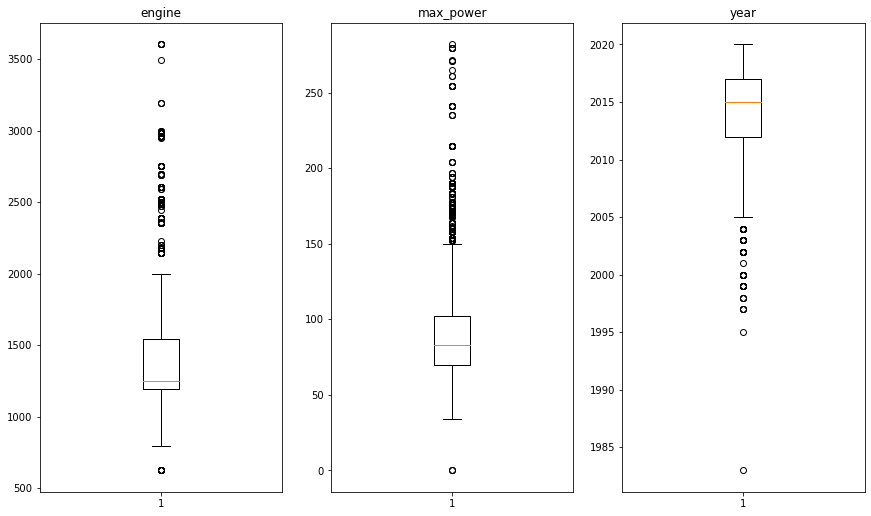

In [229]:
# Create a dictionary of columns.
col_dict = {'engine':1,'max_power':2,'year':3}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,50))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [230]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [231]:
for col in X_train.columns:
    outlier_count(col)


---------------engine---------------

Number of outliers: 611
Percent of data that is outlier: 14.65%

---------------max_power---------------

Number of outliers: 353
Percent of data that is outlier: 8.46%

---------------year---------------

Number of outliers: 91
Percent of data that is outlier: 2.18%


#### Scaler

In [232]:
from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [ ]:
import pickle
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [233]:
X_train, X_test

(array([[ 2.17382938, -0.85189219, -0.13509695],
        [ 2.11501394,  1.76984719,  0.38365545],
        [-1.32873111, -1.595084  , -1.69135417],
        ...,
        [ 0.0929799 ,  0.42058383,  1.16178406],
        [-0.91905119, -0.71641737,  0.12427925],
        [-1.29222497, -1.04111815,  0.90240786]]),
 array([[ 1.10298286,  2.65564407,  0.38365545],
        [ 2.11501394,  0.24232749, -1.43197797],
        [-1.32873111, -1.25776816,  0.64303166],
        ...,
        [ 1.08067356,  1.55868199,  0.90240786],
        [-1.32873111, -1.25776816,  0.64303166],
        [-0.41202159, -0.52554597,  0.64303166]]))

In [234]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (4172, 3)
Shape of X_test:  (1788, 3)
Shape of y_train:  (4172,)
Shape of y_test:  (1788,)


## 4.Modeling

In [235]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

MSE:  0.10716766940236898
r2:  0.8501909941832384


In [236]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Libraries for model evaluation

# models that we will be using, put them in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 2), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

In [237]:
from sklearn.model_selection import KFold, cross_val_score

#lists for keeping mse
train_mse = []
test_mse = []

#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.09498093 -0.09753757 -0.08882981 -0.09539691 -0.1107992 ]; Mean: -0.09750888194686515
SVR - Score: [-0.07558049 -0.06925854 -0.07122369 -0.08347504 -0.06905863]; Mean: -0.07371927803927816
KNeighbors Regressor - Score: [-0.0692309  -0.06559571 -0.05575907 -0.05426654 -0.06113841]; Mean: -0.06119812715648618
Decision-Tree Regressor - Score: [-0.06791354 -0.06782979 -0.06148719 -0.0590099  -0.05485481]; Mean: -0.06221904530659591
Random-Forest Regressor - Score: [-0.05130514 -0.05043646 -0.05461424 -0.0520277  -0.06290323]; Mean: -0.05425735363554394


In [240]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

best_random_state = None
best_mse = float('inf')

for random_state in range(100):  # Try different random state values
    rf = RandomForestRegressor(random_state=random_state)
    
    grid = GridSearchCV(estimator=rf, 
                        param_grid=param_grid, 
                        cv=kfold, 
                        n_jobs=-1, 
                        return_train_score=True, 
                        refit=True,
                        scoring='neg_mean_squared_error')
    
    grid.fit(X_train, y_train)
    
    valid_mse = mean_squared_error(y_test, grid.best_estimator_.predict(X_test))
    
    if valid_mse < best_mse:
        best_mse = valid_mse
        best_random_state = random_state

print(f"Best Random State: {best_random_state}")
print(f"Best Validation MSE: {best_mse:.2f}")

Best Random State: 56
Best Validation MSE: 0.05


In [242]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

rf = RandomForestRegressor(random_state = 56)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit your grid_search
grid.fit(X_train, y_train);  #fit means start looping all the possible parameters

In [243]:
from sklearn.metrics import mean_squared_error

def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    return mse

# After your grid search is done and you have your best model
best_model = grid.best_estimator_

# Evaluate the best model on the training data
train_mse = evaluate_model(best_model, X_train, y_train)

# Evaluate the best model on the test data
test_mse = evaluate_model(best_model, X_test, y_test)

print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Train MSE: 0.03
Test MSE: 0.05


In [244]:
# Find your grid_search's best score

best_mse = grid.best_score_
best_mse

-0.05285776673448863

In [246]:
#note that grid here is random forest
rf = grid.best_estimator_

rf.feature_importances_

array([0.0610263 , 0.56280848, 0.37616522])

<BarContainer object of 3 artists>

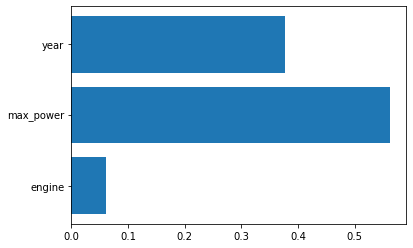

In [247]:
#let's plot
plt.barh(X.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

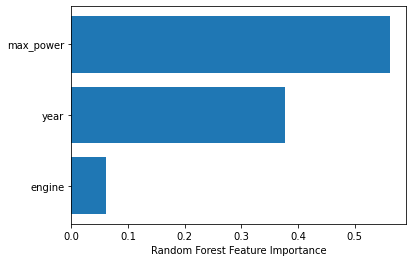

In [248]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

#### Permutation way

Text(0.5, 0, 'Random Forest Feature Importance')

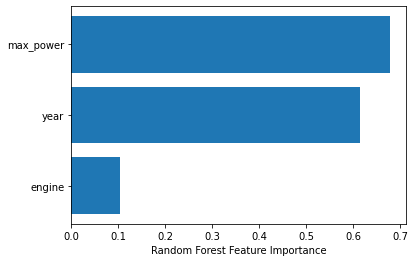

In [249]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_test, y_test)

#let's plot
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

#### Shap way


In [250]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

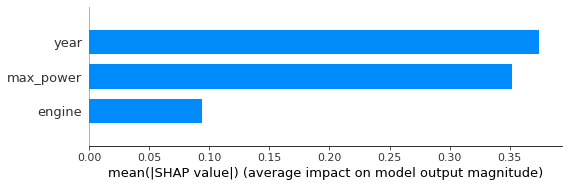

In [251]:
#shap provides plot
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = X.columns)

## 5.Inference

In [255]:
import pickle

# save the model to disk
filename = 'model/price_predict3.model'
pickle.dump(grid, open(filename, 'wb'))
pickle.dump(scaler, open("scaler3.pkl", 'wb'))
with open('scaler3.pkl', 'rb') as file:
    loaded_scaler = pickle.load(file)
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [258]:
engine = input(f'type the engine in cc unit')
power = input(f'type the power in bhp unit')
year = input(f'type the year')

input_values = np.array([[float(engine), float(power), int(year)]])

scaled = loaded_scaler.transform(input_values)

predicted_price = np.exp(loaded_model.predict(scaled))
print(f'engine : {engine} CC , Power : {power} bph, year : {year}')

print("Predicted Price:", predicted_price.item())

engine : 1248 CC , Power : 78 bph, year : 2015
Predicted Price: 453137.78652131837


this function is use to find which row of datasets is closest to user input

In [ ]:
import numpy as np
import pandas as pd

# Given values
engine = 1205
power = 60
year = 2014
predicted_price = 450000

target_values = np.array([float(engine), float(power), int(year), predicted_price], dtype=np.float64)

# Calculate the Euclidean distances between target_values and each row in df
df_filteredd['distance'] = np.sqrt(np.sum((df_filteredd[['engine', 'max_power', 'year', 'selling_price']].values - target_values) ** 2, axis=1))

C:\Users\earth\AppData\Local\Temp/ipykernel_20592/1670400914.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filteredd['distance'] = np.sqrt(np.sum((df_filteredd[['engine', 'max_power', 'year', 'selling_price']].values - target_values) ** 2, axis=1))


In [61]:
most_similar_row = df_filteredd[df_filteredd['distance'] == df_filteredd['distance'].min()]

print("Most similar row:")
print(most_similar_row)

Most similar row:
                                    name  year  selling_price  km_driven  \
5129  Datsun GO Plus Anniversary Edition  2018         450000      80000   

        fuel seller_type transmission  owner  mileage  engine  max_power  \
5129  Petrol  Individual       Manual      1    20.62  1198.0       67.0   

      seats   distance  
5129    7.0  10.677078  


### What's Important in Predicting Car Prices
I found out that certain things play a big role in figuring out how much a car costs. The size of the engine, how powerful it is, and the year the car was made are super important. These details give a clear idea about the car's performance and age. On the other hand, details like the car's name, who's selling it, or what fuel it uses don't seem to have a big impact on the price. It's like they don't matter as much.

### Figuring Out Which Guessing Method Works Best
I tried different ways to guess car prices, even though I'm not an expert yet. But there's one method that seems to work better than the rest. It's called the "Random Forest Regressor." This method is good at handling situations where things are a bit tricky and connected in complicated ways. It made better guesses compared to other methods like just drawing a line or looking at nearby cars.

To sum it up, I figured out that picking the right things to look at is really important for guessing car prices. Also, I noticed that this "Random Forest Regressor" thing could be pretty cool. There's still so much more to learn and explore, and I'm just getting started on this journey to understand car prices better.